# MINI PROJECT - STOCK PRICE PREDICTION USING MACHINE LEARNING

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
import yfinance as yf

In [13]:
tickers = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]['Symbol']

print(tickers)

0       MMM
1       AOS
2       ABT
3      ABBV
4       ACN
       ... 
498     YUM
499    ZBRA
500     ZBH
501    ZION
502     ZTS
Name: Symbol, Length: 503, dtype: object


# Data Frame

# Reduced Data Frame

In [15]:
for ticker in tickers[4:5]:
    end_date = datetime.now()
    start_date = end_date - timedelta(days = 15 * 365)
    
    history = yf.download(ticker, start = start_date, end = end_date, interval = '1d', prepost = False)
   
    history = history.loc[:,['Open', 'Close', 'Volume']]
    display(history)

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ACN: No data found for this date range, symbol may be delisted


,Open,Close,Volume
Date,,,


# Modified Data Frame

In [15]:
for ticker in tickers[4:5]:
    end_date = datetime.now()
    start_date = end_date - timedelta(days = 15 * 365)
    
    history = yf.download(ticker, start = start_date, end = end_date, interval = '1d', prepost = False)
    history = history.loc[:,['Open', 'Close', 'Volume']]
    
    history['Prev_Close'] = history.loc[:, 'Close'].shift(1)
    history['Prev_Volume'] = history.loc[:, 'Volume'].shift(1)
    
    datetimes = history.index.values
    weekdays = []
    
    for dt in datetimes:
        dt = datetime.strptime(str(dt), '%Y-%m-%dT%H:%M:%S.000000000')
        weekdays.append(dt.weekday())
        
    history['weekday'] = weekdays
    display(history)

[*********************100%***********************]  1 of 1 completed


,Open,Close,Volume,Prev_Close,Prev_Volume,weekday
Date,,,,,,
2008-01-14,33.500000,33.520000,4044200,NaN,NaN,0
2008-01-15,33.340000,33.500000,5216600,33.520000,4044200.0,1
2008-01-16,33.160000,34.040001,5807300,33.500000,5216600.0,2
2008-01-17,34.099998,33.410000,6275200,34.040001,5807300.0,3
2008-01-18,33.610001,33.770000,3091400,33.410000,6275200.0,4
...,...,...,...,...,...,...
2022-12-30,265.540009,266.839996,1339500,268.380005,1516800.0,4
2023-01-03,269.200012,270.260010,2250100,266.839996,1339500.0,1
2023-01-04,273.429993,269.339996,2052400,270.260010,2250100.0,2


# Simple Moving Averaging

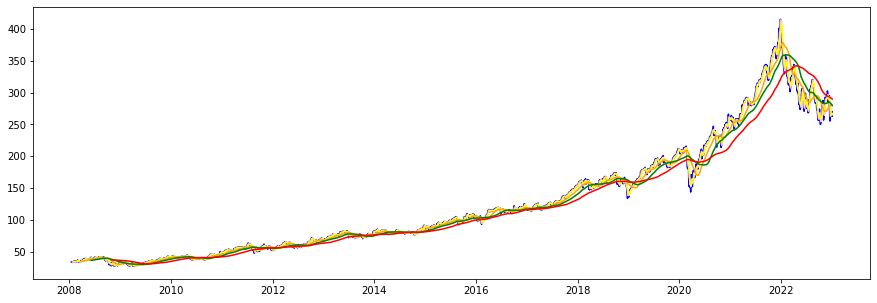

,Open,Close,Volume,Prev_Close,Prev_Volume,weekday,5SMA,10SMA,50SMA,100SMA,200SMA
Date,,,,,,,,,,,
2008-01-14,33.500000,33.520000,4044200,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2008-01-15,33.340000,33.500000,5216600,33.520000,4044200.0,1,NaN,NaN,NaN,NaN,NaN
2008-01-16,33.160000,34.040001,5807300,33.500000,5216600.0,2,NaN,NaN,NaN,NaN,NaN
2008-01-17,34.099998,33.410000,6275200,34.040001,5807300.0,3,NaN,NaN,NaN,NaN,NaN
2008-01-18,33.610001,33.770000,3091400,33.410000,6275200.0,4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-30,265.540009,266.839996,1339500,268.380005,1516800.0,4,265.532001,265.948001,280.387401,281.696001,291.127601
2023-01-03,269.200012,270.260010,2250100,266.839996,1339500.0,1,265.947998,264.520001,280.443000,281.266500,290.837251
2023-01-04,273.429993,269.339996,2052400,270.260010,2250100.0,2,266.782001,265.098001,280.612601,280.804300,290.591051


<Figure size 1080x216 with 0 Axes>

In [16]:

history['5SMA'] = history['Prev_Close'].rolling(5).mean()
history['10SMA'] = history['Prev_Close'].rolling(10).mean()
history['50SMA'] = history['Prev_Close'].rolling(50).mean()
history['100SMA'] = history['Prev_Close'].rolling(100).mean()
history['200SMA'] = history['Prev_Close'].rolling(200).mean()
    
x = history.index.values


plt.figure(figsize = (15,5))
plt.plot(x, history['Prev_Close'], color = 'blue')
plt.plot(x,history['5SMA'], color = 'Pink')
plt.plot(x,history['10SMA'], color = 'yellow')
plt.plot(x,history['50SMA'], color = 'orange')
plt.plot(x,history['100SMA'], color = 'green')
plt.plot(x, history['200SMA'], color = 'red')
plt.show()
   
plt.figure(figsize = (15, 3))
display(history)

# Linear Regression


ACN


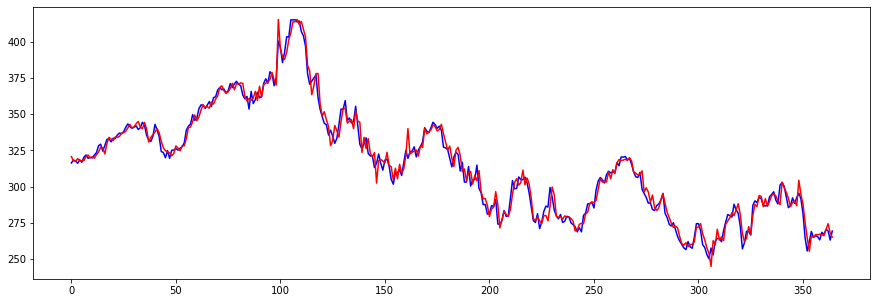

In [20]:
#Importing Linear Regression model
from sklearn.linear_model import LinearRegression


y = history['Close']
X = history.drop(['Close', 'Volume'], axis = 1).values

#Splitting into training and testing
num_test = 365
X_train = X[:-1 * num_test]
y_train = y[:-1 * num_test]
X_test = X[-1 * num_test:]
y_test = y[-1 * num_test:]

model = LinearRegression()
model = model.fit(X_train, y_train)
preds = model.predict(X_test)

print(ticker)
plt.figure(figsize=(15, 5))
plt.plot(range(len(y_test)), y_test, 'blue')
plt.plot(range(len(preds)), preds, 'red')
plt.show()

# Stock Price Prediction for 10 Companies using Linear Regression

[*********************100%***********************]  1 of 1 completed
                  Open       Close   Volume  Prev_Close  Prev_Volume  weekday  \
Date                                                                            
2008-10-28   27.959999   30.170000  4121200   27.540001    5123700.0        1   
2008-10-29   30.160000   30.780001  4150400   30.170000    4121200.0        2   
2008-10-30   32.029999   32.080002  4002200   30.780001    4150400.0        3   
2008-10-31   32.570000   33.049999  4669400   32.080002    4002200.0        4   
2008-11-03   33.220001   32.189999  3722400   33.049999    4669400.0        0   
...                ...         ...      ...         ...          ...      ...   
2022-12-30  265.540009  266.839996  1339500  268.380005    1516800.0        4   
2023-01-03  269.200012  270.260010  2250100  266.839996    1339500.0        1   
2023-01-04  273.429993  269.339996  2052400  270.260010    2250100.0        2   
2023-01-05  267.420013  262.980011  2477

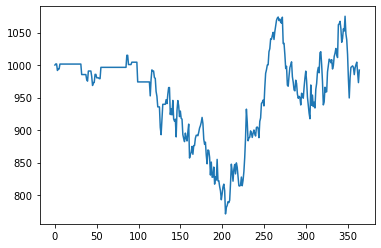

Investing_Total: 839.0524741589785 -16.1%
Algo-Trading Total: 992.2581268249504 -0.8%


In [19]:
from sklearn.linear_model import LinearRegression

#Calculating the price of the stock
def test_it(opens, Closes, preds, start_account = 1000, thresh = 0):
    account = start_account
    changes = []
    
    for i in range(len(preds)):
        if(preds[i] - opens[i]) / opens[i] >= thresh:
            account += account * (Closes[i] - opens[i]) / opens[i]
        changes.append(account)
    changes = np.array(changes)
    
    plt.plot(range(len(changes)), changes)
    plt.show()
    
    invest_total = start_account + start_account * (Closes[-1] - opens[0]) / opens[0]
    print('Investing_Total:', invest_total, str(round((invest_total - start_account) / start_account * 100,1))+'%')
    print('Algo-Trading Total:', account, str(round((account - start_account) / start_account * 100,1))+'%')




for ticker in tickers[4:5]:
    end_date = datetime.now()
    start_date = end_date - timedelta(days = 15 * 365)
    
    history = yf.download(ticker, start = start_date, end = end_date, interval = '1d', prepost = False)
    history = history.loc[:,['Open', 'Close', 'Volume']]
    
    history['Prev_Close'] = history.loc[:, 'Close'].shift(1)
    history['Prev_Volume'] = history.loc[:, 'Volume'].shift(1)
    
    datetimes = history.index.values
    weekdays = []
    
    for dt in datetimes:
        dt = datetime.strptime(str(dt), '%Y-%m-%dT%H:%M:%S.000000000')
        weekdays.append(dt.weekday())
        
    history['weekday'] = weekdays
#     display(history)
    #Mean values of Simple moving average 
    history['5SMA'] = history['Prev_Close'].rolling(5).mean()
    history['10SMA'] = history['Prev_Close'].rolling(10).mean()
    history['20SMA'] = history['Prev_Close'].rolling(20).mean()
    history['50SMA'] = history['Prev_Close'].rolling(50).mean()
    history['100SMA'] = history['Prev_Close'].rolling(100).mean()
    history['200SMA'] = history['Prev_Close'].rolling(200).mean()
    
    
   
    history = history.replace(np.inf, np.nan).dropna()
    X = history.drop(['Close', 'Volume'], axis = 1).values
    y = history['Close']
    print(history)

    #Splitting model into training and testing 
    num_test = 365
    X_train = X[:-1 * num_test]
    y_train = y[:-1 * num_test]
    X_test = X[-1 * num_test:]
    y_test = y[-1 * num_test:]

    model = LinearRegression()
    model = model.fit(X_train, y_train)
    preds = model.predict(X_test)

    print(ticker)
    test_it(X_test.T[0], y_test, preds, 1000, 0) 